In [59]:
from natasha import PER, NamesExtractor,MorphVocab,Segmenter, NewsEmbedding,NewsMorphTagger,NewsSyntaxParser,Doc,NewsNERTagger
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter

In [131]:
segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
morph_vocab = MorphVocab()

In [132]:
text_litr=open('chehov.txt','r',encoding='utf-8').readlines()[0]
text_tech=open('tech.txt','r',encoding='utf-8').readlines()[0]

# 1 общестатистические характеристики

### 1.1 общее число словоупотреблений

In [146]:
text='То вернувшийся и встревоженный муж искал по деревне свою жену. А с огородов слышался в это время несдерживаемый смех: жена забылась, опьянела и счастием нескольких часов старалась наверстать ожидавшую ее назавтра муку.'
doc = Doc(text_tech)

doc.segment(segmenter)
doc.tag_morph(morph_tagger)
n=0
for word in doc.tokens:
   if word.pos!='PUNCT':
       n+=1
print(f'Число словоупотреблений: {n}')

Число словоупотреблений: 2612


### 1.2 число различных словоформ

In [144]:
n=np.unique([token.text for token in doc.__dict__['tokens'] if token.pos!='PUNCT']).shape[0]
print(f'Число рзличных словоформ словоформ: {n}')

Число рзличных словоформ словоформ: 1628


### 1.3 средняя длина предложения (если процессор разбивает текст на предложения)

In [147]:
n=0
for sent in doc.sents:
   n+=sent.tokens.__len__()

print(f'Средняя длина предложений: {n/len(doc.sents):1f}')

Средняя длина предложений: 21.076389


# 2 Морфологические характеристики

### 2.1 абсолютная и относительная частота омонимичных словоформ

In [151]:
doc_litr = Doc(text_litr)
doc_litr.segment(segmenter)
doc_litr.tag_morph(morph_tagger)

doc_tech = Doc(text_tech)
doc_tech.segment(segmenter)
doc_tech.tag_morph(morph_tagger)

# words=[token.text for token in doc_litr]
# words_cnt=Counter()

In [138]:
len(doc_litr.tokens)

3842

### 2.2 процент разных частей речи

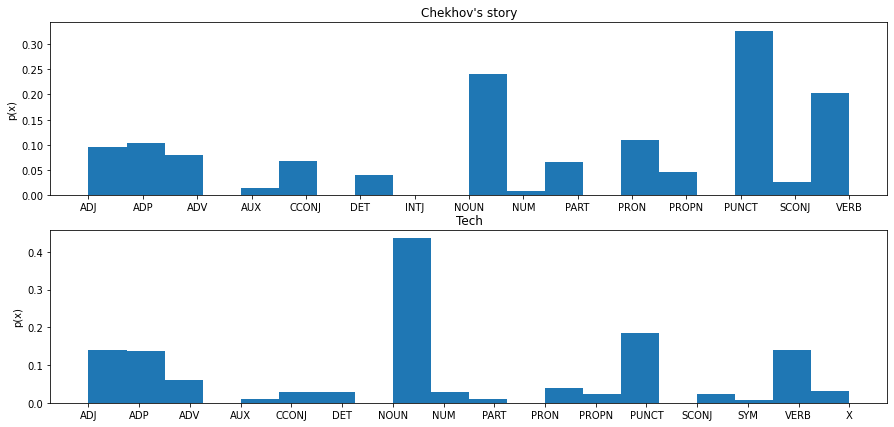

In [158]:
doc_litr = Doc(text_litr)
doc_litr.segment(segmenter)
doc_litr.tag_morph(morph_tagger)

doc_tech = Doc(text_tech)
doc_tech.segment(segmenter)
doc_tech.tag_morph(morph_tagger)

pos_litr=[]
for token in doc_litr.tokens:
    pos_litr.append(token.pos)

pos_tech=[]
for token in doc_tech.tokens:
    pos_tech.append(token.pos)

pos_litr.sort()
pos_tech.sort()

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,7))
ax1.set_ylabel('p(x)')
ax1.hist(pos_litr,bins=20,density=True)
ax1.set_title('Сhekhov\'s story')
ax2.set_ylabel('p(x)')
ax2.hist(pos_tech,bins=20,density=True)
ax2.set_title('Tech')
plt.savefig('22.png')
plt.show()

### 2.3 наиболее частотные падежи у существительных и прилагательных

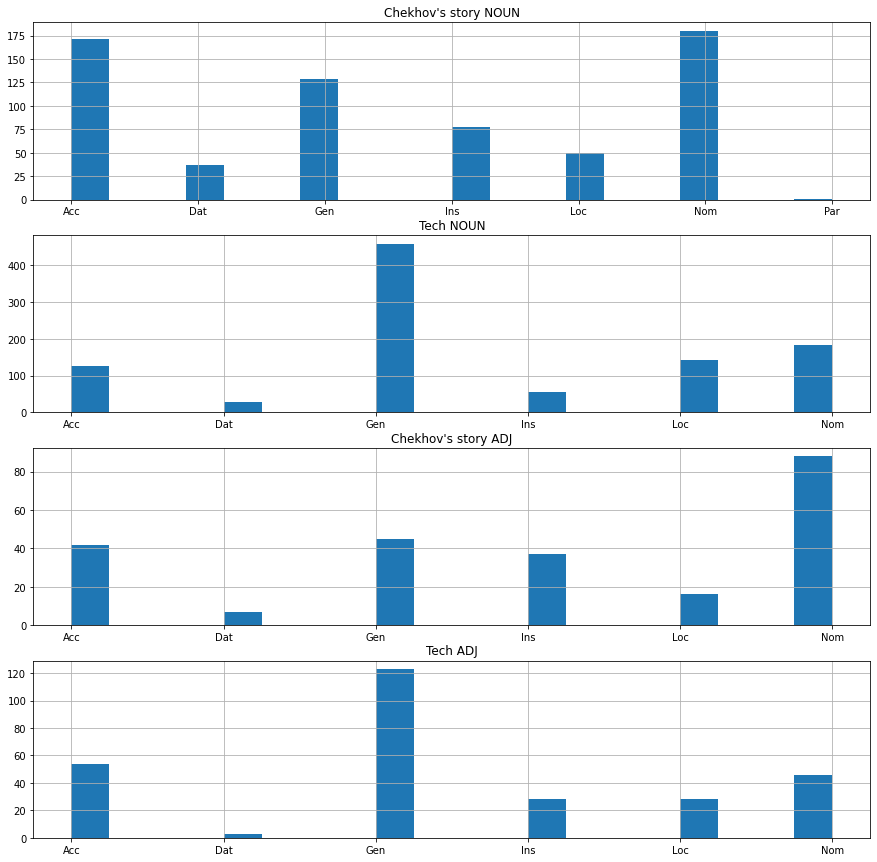

In [172]:
# doc_tech.sents[4].morph.print()

case_litr_noun=[]
for sent in doc_litr.sents:
    for token in sent.morph.tokens:
        if token.pos=='NOUN':
            case=token.feats.get('Case')
            if case is not None:
                case_litr_noun.append(case)

case_tech_noun=[]
for sent in doc_tech.sents:
    for token in sent.morph.tokens:
        if token.pos=='NOUN':
            case=token.feats.get('Case')
            if case is not None:
                case_tech_noun.append(case)

case_litr_adj=[]
for sent in doc_litr.sents:
    for token in sent.morph.tokens:
        if token.pos=='ADJ':
            case=token.feats.get('Case')
            if case is not None:
                case_litr_adj.append(case)

case_tech_adj=[]
for sent in doc_tech.sents:
    for token in sent.morph.tokens:
        if token.pos=='ADJ' :
            case=token.feats.get('Case')
            if case is not None:
                case_tech_adj.append(case)

case_litr_noun=np.sort(case_litr_noun)
case_tech_noun=np.sort(case_tech_noun)

case_litr_adj=np.sort(case_litr_adj)
case_tech_adj=np.sort(case_tech_adj)

fig,axes=plt.subplots(nrows=4,ncols=1,figsize=(15,15))
axes[0].hist(case_litr_noun,bins=20)
axes[0].grid(True)
axes[0].set_title('Сhekhov\'s story NOUN')
axes[1].hist(case_tech_noun,bins=20)
axes[1].set_title('Tech NOUN')
axes[1].grid(True)
axes[2].hist(case_litr_adj,bins=20)
axes[2].set_title('Сhekhov\'s story ADJ')
axes[2].grid(True)
axes[3].hist(case_tech_adj,bins=20)
axes[3].set_title('Tech ADJ')
axes[3].grid(True)


plt.savefig('23.png')
# plt.grid(True)
plt.show()

### 2.4 относительную частоту падежей

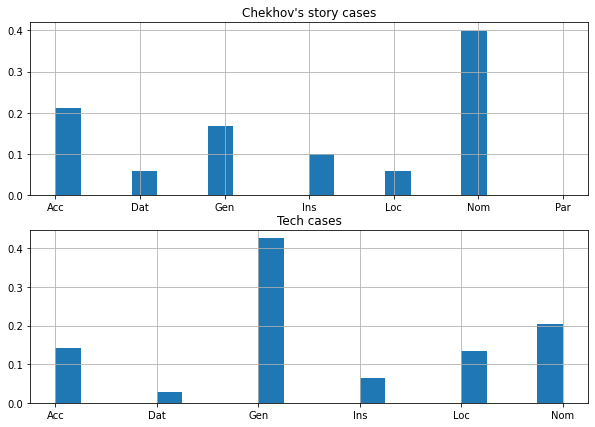

In [184]:
case_litr=[]
for sent in doc_litr.sents:
    for token in sent.morph.tokens:
            case=token.feats.get('Case')
            if case is not None:
                case_litr.append(token.feats.get('Case'))

case_tech=[]
for sent in doc_tech.sents:
    for token in sent.morph.tokens:
            case=token.feats.get('Case')
            if case is not None:
                case_tech.append(token.feats.get('Case'))

case_litr=np.sort(case_litr)
case_tech=np.sort(case_tech)

weights_litr = np.ones_like(case_litr,dtype=np.float32)/len(case_litr)
weights_tech = np.ones_like(case_tech,dtype=np.float32)/len(case_tech)

fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,7))
axes[0].hist(case_litr,bins=20,weights=weights_litr)
axes[0].set_title('Сhekhov\'s story cases')
axes[0].grid(True)

axes[1].hist(case_tech,bins=20,weights=weights_tech)
axes[1].set_title('Tech cases')
axes[1].grid(True)

plt.savefig('24.png')
plt.show()

### 2.5 наиболее частотные морфологические формы глаголов (время/лицо/число)

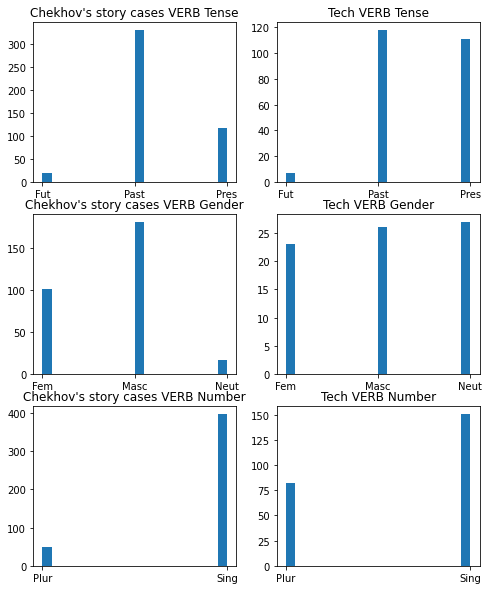

In [201]:
time_litr=[]
gender_litr=[]
number_litr=[]

for sent in doc_litr.sents:
    for token in sent.morph.tokens:
        if token.pos=='VERB':
            time=token.feats.get('Tense')
            gender=token.feats.get('Gender')
            number=token.feats.get('Number')
            if time is not None:
                time_litr.append(time)
            if gender is not None:
                gender_litr.append(gender)
            if number is not None:
                number_litr.append(number)

time_tech=[]
gender_tech=[]
number_tech=[]

for sent in doc_tech.sents:
    for token in sent.morph.tokens:
        if token.pos=='VERB':
            time=token.feats.get('Tense')
            gender=token.feats.get('Gender')
            number=token.feats.get('Number')
            if time is not None:
                time_tech.append(time)
            if gender is not None:
                gender_tech.append(gender)
            if number is not None:
                number_tech.append(number)

time_litr.sort()
gender_litr.sort()
number_litr.sort()

time_tech.sort()
gender_tech.sort()
number_tech.sort()


fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(8,10))
axes[0,0].hist(time_litr,bins=20)
axes[0,0].set_title('Сhekhov\'s story cases VERB Tense')
axes[1,0].hist(gender_litr,bins=20)
axes[1,0].set_title('Сhekhov\'s story cases VERB Gender')
axes[2,0].hist(number_litr,bins=20)
axes[2,0].set_title('Сhekhov\'s story cases VERB Number')

axes[0,1].hist(time_tech,bins=20)
axes[0,1].set_title('Tech VERB Tense')
axes[1,1].hist(gender_tech,bins=20)
axes[1,1].set_title('Tech VERB Gender')
axes[2,1].hist(number_tech,bins=20)
axes[2,1].set_title('Tech VERB Number')

plt.savefig('25.png')

plt.show()

# 3 лексические характеристики

### 3.1 количество уникальных лемм

In [189]:
for token in doc_litr.tokens:
    token.lemmatize(morph_vocab)

for token in doc_tech.tokens:
    token.lemmatize(morph_vocab)

lemmas_litr=[]
lemmas_tech=[]

for token in doc_litr.tokens:
    lemma=token.__dict__.get('lemma')
    if lemma is not None:
        lemmas_litr.append(lemma)

for token in doc_tech.tokens:
    lemma=token.__dict__.get('lemma')
    if lemma is not None:
        lemmas_tech.append(lemma)

print(f'Уникальных лемм в литературном тексте = {np.unique(lemmas_litr).shape[0]} шт')
print(f'Уникальных лемм в техническом тексте = {np.unique(lemmas_tech).shape[0]} шт ')

Уникальных лемм в литературном тексте = 1171 шт
Уникальных лемм в техническом тексте = 800 шт 


### 3.2 число уникальных лемм разных частей речи (существительных, глаголов и др.)

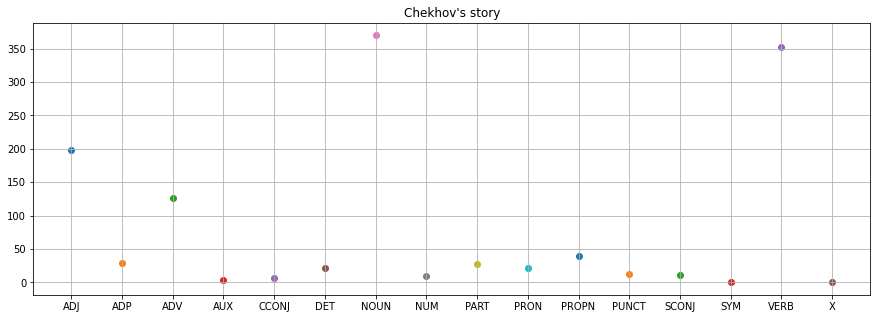

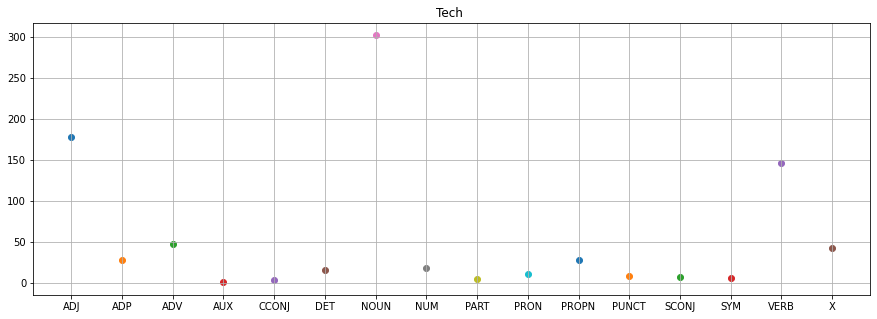

In [194]:
poses=[]
for token in doc_tech.tokens:
    poses.append(token.pos)
poses.sort()

poses=np.unique(poses)

doc=doc_tech
doc_names=['Сhekhov\'s story','Tech ']
# doc=doc_litr
for j,doc in enumerate([doc_litr,doc_tech]):
    fig,axes=plt.subplots(1,1,figsize=(15,5))
    for i,pos in enumerate(poses):
        lemmas=[]
        for token in doc.tokens:
            lemma=token.__dict__.get('lemma')
            token_pos=token.__dict__.get('pos')
            # print(lemma)
            if lemma is not None and token_pos==pos:
                lemmas.append(lemma)
        lemmas=np.unique(lemmas)

        axes.scatter(i,len(lemmas))

    plt.title(doc_names[j])
    plt.xticks(range(len(poses)), poses)
    plt.grid(True)

    plt.savefig(f'{doc_names[j]}.png')
plt.show()

### 3.3 число незнакомых слов

In [52]:
lemmas_litr=[]
for token in doc_litr.tokens:
    lemma=token.__dict__.get('lemma')
    token_pos=token.__dict__.get('pos')
    if lemma is not None and token_pos=='X':
        lemmas_litr.append(lemma)


lemmas_tech=[]
for token in doc_tech.tokens:
    lemma=token.__dict__.get('lemma')
    token_pos=token.__dict__.get('pos')
    if lemma is not None and token_pos=='X':
        lemmas_tech.append(lemma)


print(f'Уникальных лемм в литературном тексте = {np.unique(lemmas_litr).shape[0]} шт')
print(f'Уникальных лемм в техническом тексте = {np.unique(lemmas_tech).shape[0]} шт ')

Уникальных лемм в литературном тексте = 0 шт
Уникальных лемм в техническом тексте = 43 шт 


### 3.4 самые частотные слова (леммы) и их относительная частота

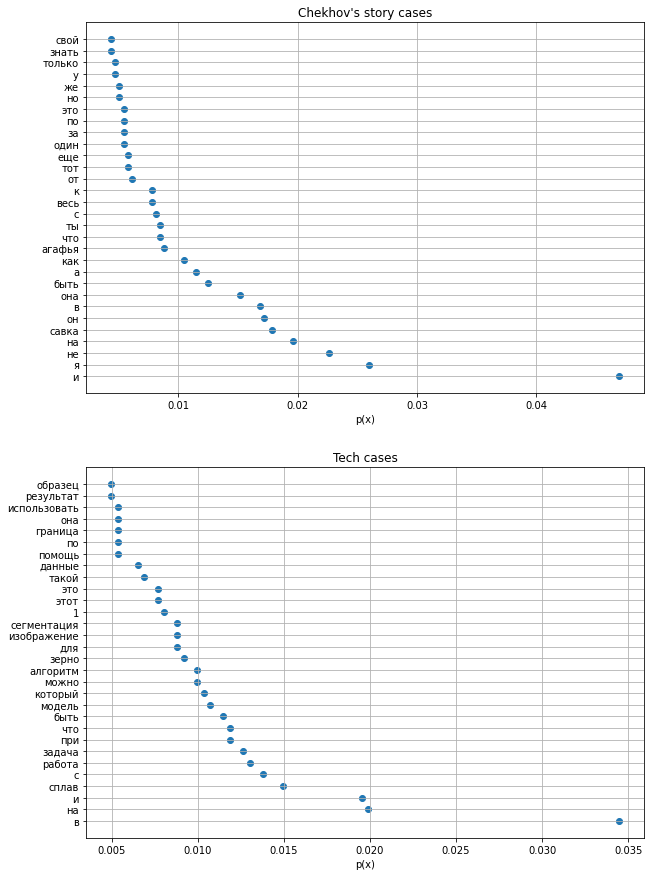

In [210]:
lemmas_litr=[]
for token in doc_litr.tokens:
    lemma=token.__dict__.get('lemma')
    pos=token.__dict__.get('pos')
    if lemma is not None and pos!='PUNCT':
        lemmas_litr.append(lemma)

lemmas_tech=[]
for token in doc_tech.tokens:
    lemma=token.__dict__.get('lemma')
    pos=token.__dict__.get('pos')
    if lemma is not None and pos!='PUNCT':
        lemmas_tech.append(lemma)

litr_cnt=Counter(lemmas_litr)
litr_cnt={k: v for k, v in sorted(litr_cnt.items(), key=lambda item: item[1],reverse=True)}
N1=sum(list(litr_cnt.values()))

tech_cnt=Counter(lemmas_tech)
tech_cnt={k: v for k, v in sorted(tech_cnt.items(), key=lambda item: item[1],reverse=True)}
N2=sum(list(tech_cnt.values()))

# print(litr_cnt)
# print('-----\n')
# print(tech_cnt)

N=30

fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,15))
axes[0].scatter(np.array(list(litr_cnt.values())[:N])/N1,range(N))
axes[0].set_yticks(range(N), list(litr_cnt.keys())[:N])
axes[0].set_title('Сhekhov\'s story cases')
axes[0].set_xlabel('p(x)')
axes[0].grid(True)

axes[1].scatter(np.array(list(tech_cnt.values())[:N])/N2,range(N))
axes[1].set_yticks(range(N), list(tech_cnt.keys())[:N])
axes[1].set_title('Tech cases')
axes[1].set_xlabel('p(x)')
axes[1].grid(True)


plt.savefig('34.png')
plt.show()

### 3.5 самые частотные слова (леммы) основных частей речи (существительные, прилагательные, наречия, глаголы)

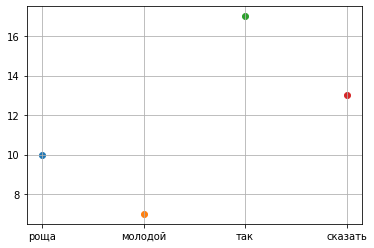

In [213]:
# doc_e=doc_tech
doc_e=doc_litr

poses=['NOUN','ADJ','ADV','VERB']

xticks=[]

for i,pos in enumerate(poses):
    lemmas=[]
    for token in doc_e.tokens:
        # print(token)
        lemma=token.__dict__.get('lemma')
        token_pos=token.__dict__.get('pos')
        # print(lemma)
        if lemma is not None and token_pos==pos:
            lemmas.append(lemma)

    lemma_cnt=Counter(lemmas)
    lemma_cnt={k: v for k, v in sorted(lemma_cnt.items(), key=lambda item: item[1],reverse=True)}

    plt.scatter(i,list(lemma_cnt.values())[0])
    xticks.append(list(lemma_cnt.keys())[1])

# plt.title('Количество уникальных лемм в каждой части речи')
plt.xticks(range(len(xticks)), xticks)
plt.grid(True)
plt.savefig('chehov_35.png')
plt.show()

### 3.6 коэффициент лексического богатства текста (=отношение числа различных лемм к общему числу словоупотреблений)

In [54]:
for token in doc_litr.tokens:
    token.lemmatize(morph_vocab)

for token in doc_tech.tokens:
    token.lemmatize(morph_vocab)

lemmas_litr=[]
lemmas_tech=[]

for token in doc_litr.tokens:
    lemma=token.__dict__.get('lemma')
    if lemma is not None:
        lemmas_litr.append(lemma)

for token in doc_tech.tokens:
    lemma=token.__dict__.get('lemma')
    if lemma is not None:
        lemmas_tech.append(lemma)

words_litr=[token.text for token in doc_litr.tokens]
words_tech=[token.text for token in doc_tech.tokens]

words_litr=np.unique(words_litr)
words_tech=np.unique(words_tech)

print(f'Коэффициент богатства в литературном тексте = {np.unique(lemmas_litr).shape[0]/words_litr.shape[0]} шт')
print(f'Коэффициент богатства в техническом тексте = {np.unique(lemmas_tech).shape[0]/words_tech.shape[0]} шт ')

Коэффициент богатства в литературном тексте = 0.7144600366076876 шт
Коэффициент богатства в техническом тексте = 0.6498781478472786 шт 
